In [1]:
from Bending.FullBending import FullBending
import numpy as np
import pandas as pd

In [2]:
from validation.FullExperimental import FullExperimental

df_stats = FullExperimental()
# double layer
layers = df_stats["layers"].values
layers[0] = ["Y","Y"]
df_stats["layers"] = layers


In [3]:
# Material properties

df_layers = pd.DataFrame({ 'E': [0.800000	,   # nucleo
                                 5.198613	,   # X
                                 2.814443		,   # SX
                                 21.284290    ,   # Y
                                 5.775806]}  ,   # SY
                                 index=['nucleo', 'X', 'SX', 'Y', 'SY'])

St_layers = {
    "X"   : 481.083731,   # MPa
    "SX"  : 80.120493,    # MPa
    "Y"   : 667.663085,   # MPa
    "SY"  : 127.036236,   # MPa
    "nucleo" : 0.0,
}

En = df_layers.loc["nucleo"].values[-1]*1e3

params = {
            "El": df_layers.loc[["X","SX","Y","SY"]].values.flatten(),
            "geo" : {
                        "t_n" : 3.073400,
                        "t_l" : 0.427120,
                        "Lx"  : 30,
                        "meshsizefactor" : 1.1,
                    },
            "sim" : {
                        "disp" : 5.0,
                        "opt": {
                                    "OMP_NUM_THREADS":4,
                                    "mpi_np":4,
                                    "mpi":True
                                },
                        "E_n":  En
                    },
            "tensile" : {
                        "disp" : 2.0,
                        "St_layers": St_layers,
                    },
        }


In [4]:
df_stats

Et [GPa]                 % e              St [MPa]             \
          mean       std      mean       std        mean        std   
Name                                                                  
TFP1  2.885509  0.227295  0.123306  0.009827  279.103333  14.337700   
TFP2  2.258503  0.065626  0.087556  0.002840  153.360000   0.473181   
TFP3  2.000437  0.004435  0.087444  0.002164  137.113333   4.996812   
TFP4  2.451362  0.114353  0.095472  0.005491  184.396667   1.356515   
TFP5  1.626582  0.120272  0.089889  0.013757   99.990000   9.790138   
TFP6  1.739870  0.067515  0.089083  0.010304  104.513333   7.708893   

       Eb [GPa]              t [mm]               b [mm]            \
           mean       std      mean       std       mean       std   
Name                                                                 
TFP1  13.201050  0.630858  5.266667  0.057735  25.600000  0.100000   
TFP2   9.869501  0.780113  4.700000  0.000000  25.566667  0.057735   
TFP3   9.222003  0.495965  4.833333  0.057735  25.400000  0.173205   
TFP4  10.181815  0.770635  4.700000  0.000000  25.666667  0.152753   
TFP5   6.143105  0.161637  5.700000  0.000000  25.166667  0.152753   
TFP6   7.798060  0.334186  5.600000  0.000000  25.033333  0.635085   

        Sb [MPa]                  layers     Vc  
            mean        std                      
Name                                             
TFP1  134.996667  18.942693       [Y, Y]  0.178  
TFP2  117.430000  15.759607       [Y, X]  0.164  
TFP3  128.053333   5.337905      [Y, SX]  0.135  
TFP4  141.703333   7.525386      [Y, SY]  0.144  
TFP5  107.433333   3.902939  [Y, SX, SY]  0.146  
TFP6  114.306667  11.800790   [Y, X, SY]  0.180

In [5]:
import os 
from copy import deepcopy
join = os.path.join


if not os.path.exists("output"):
    os.mkdir("output")

In [ ]:

all_params = []

for id_design in range(6):

    params_loop = deepcopy(params)
    # =============================================================================
    params_loop["geo"]["Ly"]  = df_stats["b [mm]"]["mean"].iloc[id_design]
    
    lyrs = df_stats["layers"].iloc[id_design]
    E_l  = df_layers.loc[lyrs]["E"].values*1e3 # MPa
    params_loop["sim"]["E_l"] = E_l
    params_loop["sim"]["name_mat"] = df_stats["layers"].iloc[id_design]
    # =============================================================================
    name = df_stats.index[id_design]
    params_loop["output_folder"] = join("output", name)
    
    inp_f = FullBending(params_loop)
    
    all_params.append(params_loop)    

Running Calculix at:  output\TFP1\sim
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_BendingTest\NumericalModel\output\TFP1\sim\out.txt
Command:
 C:\Program Files\Microsoft MPI\Bin\mpiexec -n 4 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  9064 

Calculix finished

['Y', 'Y', 'nucleo', 'Y', 'Y']
Time Step:
Time Step:
Time Step:
Running Calculix at:  output\TFP1\tensile
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_BendingTest\NumericalModel\output\TFP1\tensile\out.txt
Command:
 C:\Program Files\Microsoft MPI\Bin\mpiexec -n 4 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  14976 

Calculix finished

['Y', 'Y', 'nucleo', 'Y', 'Y']
Running Calculix at:  output\TFP2\sim
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composi

In [ ]:
df_stats["Eb pred [GPa]"]  = [ iall_params["Eflex"] for iall_params in all_params]
df_stats["Et pred [GPa]"]  = [ iall_params["Etensile"] for iall_params in all_params]
df_stats["Eb analytical pred [GPa]"]  = [ iall_params["Eflexion_analytical"] for iall_params in all_params]
df_stats["Et analytical pred [GPa]"]  = [ iall_params["Etensile_analytical"] for iall_params in all_params]
df_stats["St pred [MPa]"] = [ iall_params["rpost"]["S_prediction"] for iall_params in all_params]
df_stats["Sb pred [MPa]"] = [ iall_params["rpostbending"] for iall_params in all_params]

df_stats["St analytical pred [MPa]"] = [ 1e3*iall_params["St_analytical"] for iall_params in all_params]
df_stats["Sb analytical pred [MPa]"] = [ iall_params["Sb_analytical"] for iall_params in all_params]

tau_pred  = [ iall_params["geo"]["t_t"] for iall_params in all_params]
df_stats["t pred [mm]"] = tau_pred


In [ ]:
df_stats.columns

MultiIndex([(                'Et [GPa]', 'mean'),
            (                'Et [GPa]',  'std'),
            (                     '% e', 'mean'),
            (                     '% e',  'std'),
            (                'St [MPa]', 'mean'),
            (                'St [MPa]',  'std'),
            (                'Eb [GPa]', 'mean'),
            (                'Eb [GPa]',  'std'),
            (                  't [mm]', 'mean'),
            (                  't [mm]',  'std'),
            (                  'b [mm]', 'mean'),
            (                  'b [mm]',  'std'),
            (                'Sb [MPa]', 'mean'),
            (                'Sb [MPa]',  'std'),
            (                  'layers',     ''),
            (                      'Vc',     ''),
            (           'Eb pred [GPa]',     ''),
            (           'Et pred [GPa]',     ''),
            ('Eb analytical pred [GPa]',     ''),
            ('Et analytical pred [GPa]',     ''),


In [ ]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Modulo Tracción [GPa]')

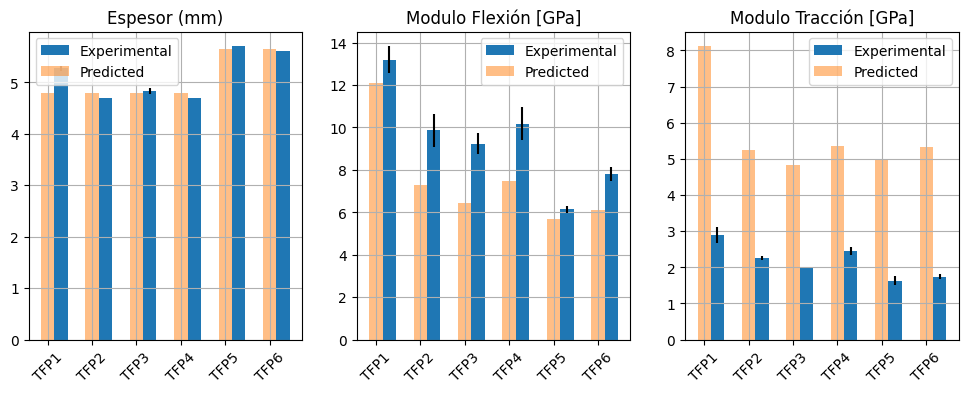

In [ ]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)

plt.bar(idx_range+width , df_stats['t [mm]']['mean'], yerr=df_stats['t [mm]']['std'], label='Experimental',width=width)
plt.bar(idx_range, tau_pred, label='Predicted', alpha=0.5, width=width)
plt.title('Espesor (mm)')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('') 
plt.grid()
plt.xticks(idx_range, idx);

ax = fig.add_subplot(132)

# plot bars with error bars Modulo Tracción [MPa] and prediction

plt.bar(idx_range+width , df_stats['Eb [GPa]']['mean'], yerr=df_stats['Eb [GPa]']['std'], label='Experimental',width=width)
plt.bar(idx_range, df_stats['Eb pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

ax = fig.add_subplot(133)

# plot bars with error bars St [MPa] and prediction
Et_exp = df_stats["Et [GPa]"]["mean"]
Et_exp_err = df_stats["Et [GPa]"]["std"]

plt.bar(idx_range+width , Et_exp, yerr=Et_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Et pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Modulo Tracción [GPa]')


In [ ]:
df_stats

Et [GPa]                 % e              St [MPa]             \
          mean       std      mean       std        mean        std   
Name                                                                  
TFP1  2.885509  0.227295  0.123306  0.009827  279.103333  14.337700   
TFP2  2.258503  0.065626  0.087556  0.002840  153.360000   0.473181   
TFP3  2.000437  0.004435  0.087444  0.002164  137.113333   4.996812   
TFP4  2.451362  0.114353  0.095472  0.005491  184.396667   1.356515   
TFP5  1.626582  0.120272  0.089889  0.013757   99.990000   9.790138   
TFP6  1.739870  0.067515  0.089083  0.010304  104.513333   7.708893   

       Eb [GPa]              t [mm]            ...     Vc Eb pred [GPa]  \
           mean       std      mean       std  ...                        
Name                                           ...                        
TFP1  13.201050  0.630858  5.266667  0.057735  ...  0.178     12.108982   
TFP2   9.869501  0.780113  4.700000  0.000000  ...  0.164      7.272978   
TFP3   9.222003  0.495965  4.833333  0.057735  ...  0.135      6.448461   
TFP4  10.181815  0.770635  4.700000  0.000000  ...  0.144      7.466634   
TFP5   6.143105  0.161637  5.700000  0.000000  ...  0.146      5.667777   
TFP6   7.798060  0.334186  5.600000  0.000000  ...  0.180      6.127003   

     Et pred [GPa] Eb analytical pred [GPa] Et analytical pred [GPa]  \
                                                                       
Name                                                                   
TFP1      8.118666                15.845752                 8.118670   
TFP2      5.245108                 8.673371                 5.245108   
TFP3      4.819198                 7.610303                 4.819197   
TFP4      5.348218                 8.930734                 5.348218   
TFP5      4.964186                 6.896204                 4.964186   
TFP6      5.325542                 7.545461                 5.325543   

     St pred [MPa] Sb pred [MPa] St analytical pred [MPa]  \
                                                            
Name                                                        
TFP1    254.675318    423.790171               254.673094   
TFP2    164.534137    517.171171               164.532841   
TFP3    137.192761    232.729787               137.191067   
TFP4    117.632884    166.575275               117.631630   
TFP5    109.186090    158.008671               109.185015   
TFP6    117.133943    171.135030               117.132906   

     Sb analytical pred [MPa] t pred [mm]  
                                           
Name                                       
TFP1                 0.254673     4.78188  
TFP2                 0.200318     4.78188  
TFP3                 0.137191     4.78188  
TFP4                 0.117632     4.78188  
TFP5                 0.109185     5.63612  
TFP6                 0.117133     5.63612  

[6 rows x 25 columns]

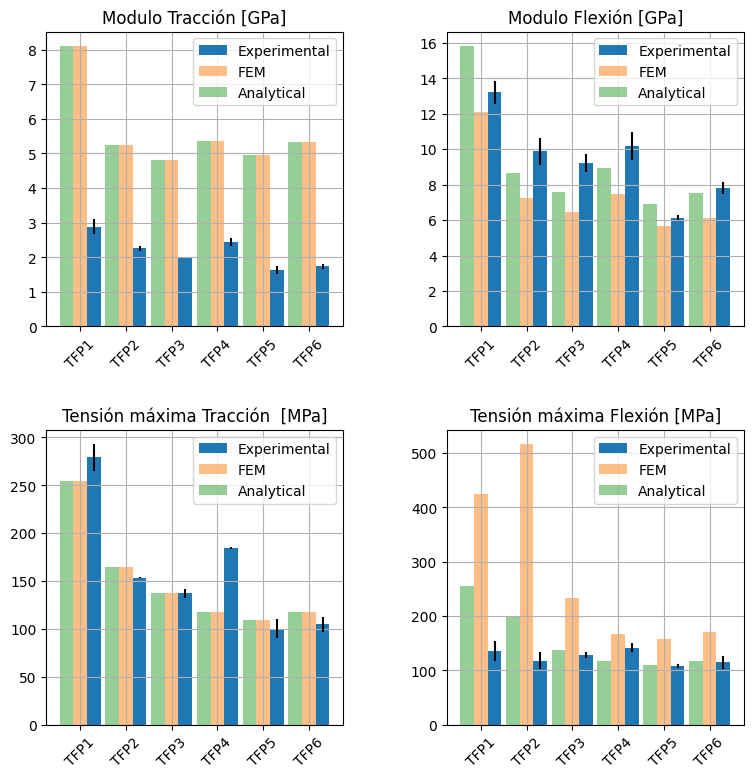

In [ ]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(9, 9))
# subplot 
fig.subplots_adjust(hspace=0.35, wspace=0.35)

ax = fig.add_subplot(222)

# plot bars with error bars Modulo Flexion [GPa] and prediction

plt.bar(idx_range+width , df_stats['Eb [GPa]']['mean'], yerr=df_stats['Eb [GPa]']['std'], label='Experimental',width=width)
plt.bar(idx_range, df_stats['Eb pred [GPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['Eb analytical pred [GPa]'], label='Analytical', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

ax = fig.add_subplot(221)

# plot bars with error bars Modulo Tracción [MPa] and prediction
Et_exp = df_stats["Et [GPa]"]["mean"]
Et_exp_err = df_stats["Et [GPa]"]["std"]

plt.bar(idx_range+width , Et_exp, yerr=Et_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Et pred [GPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['Et analytical pred [GPa]'], label='Analytical', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Modulo Tracción [GPa]')


ax = fig.add_subplot(223)

# 
St_exp = df_stats["St [MPa]"]["mean"]
St_exp_err = df_stats["St [MPa]"]["std"]

plt.bar(idx_range+width , St_exp, yerr=St_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['St pred [MPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['St analytical pred [MPa]'], label='Analytical', alpha=0.5, width=width)

plt.legend()
plt.grid()
# off xlabel

plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Tensión máxima Tracción  [MPa]')
# ========================
ax = fig.add_subplot(224)

Sb_exp = df_stats["Sb [MPa]"]["mean"]
Sb_exp_err = df_stats["Sb [MPa]"]["std"]

plt.bar(idx_range+width , Sb_exp, yerr=Sb_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Sb pred [MPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, 1e3*df_stats['Sb analytical pred [MPa]'], label='Analytical', alpha=0.5, width=width)

plt.title('Tensión máxima Flexión [MPa]')
plt.xlabel('')
plt.xticks(rotation=45)
plt.xticks(idx_range, idx);
plt.legend()
plt.grid()

In [ ]:
Et_exp

Name
TFP1    2.885509
TFP2    2.258503
TFP3    2.000437
TFP4    2.451362
TFP5    1.626582
TFP6    1.739870
Name: mean, dtype: float64

In [ ]:
df_stats

Et [GPa]                 % e              St [MPa]             \
          mean       std      mean       std        mean        std   
Name                                                                  
TFP1  2.885509  0.227295  0.123306  0.009827  279.103333  14.337700   
TFP2  2.258503  0.065626  0.087556  0.002840  153.360000   0.473181   
TFP3  2.000437  0.004435  0.087444  0.002164  137.113333   4.996812   
TFP4  2.451362  0.114353  0.095472  0.005491  184.396667   1.356515   
TFP5  1.626582  0.120272  0.089889  0.013757   99.990000   9.790138   
TFP6  1.739870  0.067515  0.089083  0.010304  104.513333   7.708893   

       Eb [GPa]              t [mm]            ...     Vc Eb pred [GPa]  \
           mean       std      mean       std  ...                        
Name                                           ...                        
TFP1  13.201050  0.630858  5.266667  0.057735  ...  0.178     12.108982   
TFP2   9.869501  0.780113  4.700000  0.000000  ...  0.164      7.272978   
TFP3   9.222003  0.495965  4.833333  0.057735  ...  0.135      6.448461   
TFP4  10.181815  0.770635  4.700000  0.000000  ...  0.144      7.466634   
TFP5   6.143105  0.161637  5.700000  0.000000  ...  0.146      5.667777   
TFP6   7.798060  0.334186  5.600000  0.000000  ...  0.180      6.127003   

     Et pred [GPa] Eb analytical pred [GPa] Et analytical pred [GPa]  \
                                                                       
Name                                                                   
TFP1      8.118666                15.845752                 8.118670   
TFP2      5.245108                 8.673371                 5.245108   
TFP3      4.819198                 7.610303                 4.819197   
TFP4      5.348218                 8.930734                 5.348218   
TFP5      4.964186                 6.896204                 4.964186   
TFP6      5.325542                 7.545461                 5.325543   

     St pred [MPa] Sb pred [MPa] St analytical pred [MPa]  \
                                                            
Name                                                        
TFP1    254.675318    423.790171               254.673094   
TFP2    164.534137    517.171171               164.532841   
TFP3    137.192761    232.729787               137.191067   
TFP4    117.632884    166.575275               117.631630   
TFP5    109.186090    158.008671               109.185015   
TFP6    117.133943    171.135030               117.132906   

     Sb analytical pred [MPa] t pred [mm]  
                                           
Name                                       
TFP1                 0.254673     4.78188  
TFP2                 0.200318     4.78188  
TFP3                 0.137191     4.78188  
TFP4                 0.117632     4.78188  
TFP5                 0.109185     5.63612  
TFP6                 0.117133     5.63612  

[6 rows x 25 columns]

In [ ]:
df_save = pd.DataFrame({"Eb [GPa]": df_stats['Eb [GPa]']['mean'].values,
                        "Eb pred [GPa]": df_stats['Eb pred [GPa]'].values,
                        "Et [GPa]": df_stats["Et [GPa]"]["mean"].values,
                        "Et pred [GPa]": df_stats['Et pred [GPa]'].values,
                        "Name": df_stats.index})

df_save.to_csv("output.csv", index=False)

In [ ]:
params

{'El': array([ 5.198613,  2.814443, 21.28429 ,  5.775806]),
 'geo': {'t_n': 3.0734, 't_l': 0.42712, 'Lx': 30, 'meshsizefactor': 1.1},
 'sim': {'disp': 5.0,
  'opt': {'OMP_NUM_THREADS': 4, 'mpi_np': 4, 'mpi': True},
  'E_n': np.float64(800.0)},
 'tensile': {'disp': 2.0,
  'St_layers': {'X': 481.083731,
   'SX': 80.120493,
   'Y': 667.663085,
   'SY': 127.036236,
   'nucleo': 0.0}}}

In [ ]:
El = df_layers.loc["Y"].values
En = df_layers.loc["nucleo"].values
tn = params["geo"]["t_n"]
tl = params["geo"]["t_l"]

In [ ]:
print("El", El)
print("En", En)
print("tn", tn)
print("tl", tl)

El [21.28429]
En [0.8]
tn 3.0734
tl 0.42712


In [ ]:
E_eff = (En*tn + 2*(2*El*tl)) / (tn + 2*(2*tl))
print(E_eff)

[8.1186696]
